In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime


from sklearn.model_selecton import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifieri

ModuleNotFoundError: No module named 'sklearn.model_selecton'

In [4]:
#uploading kickstarter data
df = pd.read_csv('ks-projects-201801.csv')

FileNotFoundError: [Errno 2] File b'ks-projects-201801.csv' does not exist: b'ks-projects-201801.csv'

In [5]:
# know the data better
df.head(10)

NameError: name 'df' is not defined

In [6]:
df.shape


NameError: name 'df' is not defined

In [7]:
df.info()


NameError: name 'df' is not defined

#We have 15 initial features:

ID: internal kickstarter id

name: name of project - A project is a finite work with a clear goal that you’d like to bring to life. Think albums, books, or films.

category: category

main_category: category of campaign

currency: currency used to support

deadline: deadline for crowdfunding

goal: fundraising goal - The funding goal is the amount of money that a creator needs to complete their project.

launched: date launched

pledged: amount pledged by "crowd"

state: Current condition the project is in

backers: number of backers

country: country pledged from

usd pledged: Pledged amount in USD

usd_pledged_real: Pledged amount in USD

usd_goal_real: Goal amount in USD

In [8]:
#NaN vals treament
df.isnull().sum()


NameError: name 'df' is not defined

In [9]:
missing_data=round(((df.isnull().sum())/(df.isnull().count()))*100)


NameError: name 'df' is not defined

In [ ]:
missing_data


In [ ]:
#fill missing values. if we look closer at the DF we can see that those 2 features look quite the same
df['usd pledged'].fillna(df['usd_pledged_real'], inplace=True)

missing_data=round(((df.isnull().sum())/(df.isnull().count()))*100)
missing_data


In [10]:
#steel learning kickstartr,creating series of the amount of uniques values
ser = df.nunique()
print('numbers of countries using KS (applying projects):')
print(ser['country']) 

#catgories can be : sports, food, games, ETC.
ser['main_category']
print('number of main categories:')
print(ser['main_category'])
print('number of categories:')
print(ser['category'])

NameError: name 'df' is not defined

In [ ]:
ser

In [ ]:
df["state"].value_counts()


In [ ]:
percentual_sucess = round(df["state"].value_counts() / len(df["state"]) * 100,4)

print("State Percentual in %: ")
print(percentual_sucess)

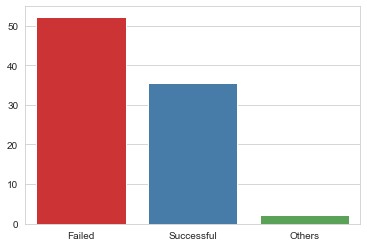

In [11]:
#seaborn visualiztion
sns.set_style("whitegrid")
sns.barplot(["Failed", "Successful", "Others"],
            y= [52.2153, 35.3762, 0.9407+0.7392+0.4875],
            palette = "Set1"
            )

In [12]:
#df['country'].value_counts()

#run the line above in order to understand the next plotting

In [13]:
df['country'].value_counts().plot.bar()
plt.show()


NameError: name 'df' is not defined

In [ ]:
df1=df.groupby('main_category').state.value_counts().unstack()
df1.head()

In [ ]:
# try understanding alone the next few cells, and why I did it. 
df1 = df1.drop(columns=['live','suspended','undefined','canceled'])


In [ ]:
df1['delta'] = df1['successful'] - df1['failed']


In [ ]:
df1.sort_values(by=['delta'])


In [ ]:
#well, before lanching a KS project it's better for you to know this plot.comics in, tech out.
df1['delta'].plot.barh()
plt.show()

#This Is Horizontal Bar

In [ ]:
sucess_games = df[(df['main_category'] == 'Games') & 
                      (df['state'] == 'successful')]
plt.figure(figsize=(12,12))
plt.subplot(3,1,3)
ax2 = sns.countplot(x='category', data=sucess_games)

ax2.set_title("Category Games that Succed", fontsize=15)
ax2.set_xlabel("Categorys of Games with Sucess", fontsize=12)
ax2.set_ylabel("Counts", fontsize=12)
plt.show()

In [ ]:
#preper the data- from now and on we will use df2 (cleaning process)
df2 = df[ ((df['state'] == 'failed') | 
           (df['state'] == 'successful')) & 
         (df['country'] == 'US') ]
df2 = df2.drop(columns=['ID','name','usd pledged','usd_pledged_real','country','usd_goal_real','category','currency','pledged'])

print(df2.shape)
df2.head()

In [14]:
#prepertions
df2['month'] = pd.DatetimeIndex(df2['launched']).month

df2['state'] = df2['state'].map({     
        'failed': 0,
        'successful': 1         
})

df2['main_category']=df2['main_category'].map({     
        'Technology': 1,
        'Publishing': 2 ,
        'Food': 3 ,
        'Film & Video': 4 ,
        'Fashion': 5 ,
        'Design': 6 ,
        'Crafts': 7 ,
        'Games': 8 ,
        'Photography': 9 ,
        'Art': 10 ,
        'Journalism': 11 ,
        'Dance': 12 ,
        'Comics': 13 ,
        'Music': 14 ,
        'Theater': 15
})

#by the way, we can do this more simplly with this code:
#from sklearn.preprocessing import LabelEncoder
#labelencoder = LabelEncoder()
#df2.main_category = labelencoder.fit_transform(df2.main_category)

NameError: name 'df2' is not defined

In [ ]:
df2=df2.drop(columns=['launched','deadline','backers'])  
df2.head(10)                                 
# I dropped the features above because I assume that for a new kickstart project we may not have any preknowledge.

In [ ]:
#Dummies var - same code we saw in the class
df2['month'].value_counts()


In [ ]:
#dummies for  month
df3 = pd.get_dummies(df2.month)
df2 = df2.join(df3)
df2=df2.drop(columns=['month'])
df2.head()

In [15]:
#we start with 'df' and go to the model stage with 'df2'
print(df.shape)

print(df2.shape)

NameError: name 'df' is not defined

In [16]:
#Splitting the data - train & test sets
X=df2.drop('state',axis=1)
y=df2['state']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

NameError: name 'df2' is not defined

In [33]:
#scaling for Knn for example is important. If we want we can use: 
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(X)
#scaled_fetaurs = scaler.transform (X)

In [34]:
# Logistic Regression
lr=LogisticRegression()
lr.fit(X_train,y_train)
#we used the train model to get the prediction for our test data set (X_test)
predictions=lr.predict(X_test)

C:\Users\tehil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [2]:
confusion_matrix(y_test, predictions)


NameError: name 'confusion_matrix' is not defined

In [36]:
print(metrics.accuracy_score(y_test,predictions))


0.5826966109751998


In [37]:
#knn - predictions are made 
k=KNeighborsClassifier(n_neighbors=1)
k.fit(X_train,y_train)
#now we have train the model

predictions=k.predict(X_test)

In [38]:
#evalution procces
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.62      0.63      0.63     50257
           1       0.48      0.47      0.47     35992

    accuracy                           0.56     86249
   macro avg       0.55      0.55      0.55     86249
weighted avg       0.56      0.56      0.56     86249



In [39]:
print(confusion_matrix(y_test, predictions))


[[31785 18472]
 [19108 16884]]


In [40]:
#now lets find the optimum K 
err_rate = []
for i in range(1,30):
    k = KNeighborsClassifier(n_neighbors=i)
    k.fit(X_train, y_train)
    pred_i=k.predict(X_test)
    
    err_rate.append(np.mean(pred_i !=y_test))

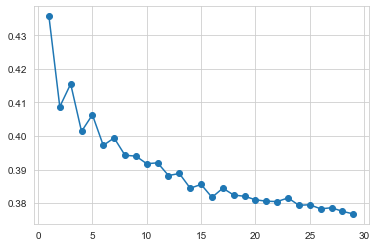

In [41]:
plt.plot(range(1,30), err_rate, marker='o')
#we can learn that k=1 its a bad choice. looks like we need bigger K value. k>30


In [42]:
#knn - predictions are made 
k=KNeighborsClassifier(n_neighbors=30)
k.fit(X_train,y_train)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.62      0.63      0.63     50257
           1       0.48      0.47      0.47     35992

    accuracy                           0.56     86249
   macro avg       0.55      0.55      0.55     86249
weighted avg       0.56      0.56      0.56     86249

[[31785 18472]
 [19108 16884]]
